In [2]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/vw_emergency_episode_random_50k.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str',
  'ambulance_number':'str'})

In [3]:
list(dataset.columns)

['sequence_number',
 'establishment_code',
 'sex',
 'ethnicity',
 'marital_status',
 'interpreter_required',
 'employment_status',
 'occupation',
 'triage_category',
 'visit_type',
 'mode_of_arrival',
 'referral_source',
 'primary_diagnosis',
 'presenting_complaint',
 'major_diagnostic_category',
 'human_intent_of_injury',
 'feeder_system',
 'external_cause_of_injury',
 'state',
 'claim_type',
 'senior_doctor_type',
 'ambulance_number',
 'statistical_area_2_2016',
 'payment_classification',
 'aboriginality',
 'primary_diagnosis_ICD10AM_chapter',
 'principal_diagnosis_system_code_EDIS',
 'additional_diagnosis_system_code_EDIS',
 'standard_australian_classification_of_countries_2011_for_country_of_birth',
 'australian_postcode',
 'metropolitan_hospital_flag',
 'rural_hospital_flag',
 'local_health_network',
 'attendance_length_of_episode',
 'attendance',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_hours',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_hours_d

In [4]:
dataset.shape

(50000, 68)

In [5]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (47500, 68)
Unseen Data For Predictions: (2500, 68)


In [6]:
from pycaret.classification import *

In [17]:
#Ordinal Encoding
#When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, 
#these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). 
#This can be achieved using  the ordinal_features parameter in the setup function that accepts a dictionary with feature 
#names and the levels in the increasing order from lowest to highest.

#triage rating needs to setup as ordinal 
#ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
admission_test_1 = setup(data = data, target = 'admission',
                         normalize = True,
                         ignore_features=[
                                          'sequence_number',
                                          'attendance_length_of_episode', 
                                          'reattendance_within_48_hours_for_the_same_condition', 
                                          'admission_with_length_of_episode_less_than_or_equal_to_4_hours',
                                          'admission_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
                                          'departure_with_length_of_episode_less_than_or_equal_to_4_hours'],
                         ordinal_features = {'triage_category' : ['5','4','3','2','1']},
                         high_cardinality_features = ['presenting_complaint','australian_postcode',
                                                      'primary_diagnosis','primary_diagnosis_ICD10AM_chapter',
                                                      'principal_diagnosis_system_code_EDIS',
                                                      'australian_postcode'], 
                         bin_numeric_features = ['age'],
                         session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(47500, 68)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,56
8,Ordinal Features,True
9,High Cardinality Features,True


In [18]:
best_model = compare_models(exclude = ['knn', 'qda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9945,0.9991,0.9975,0.9889,0.9932,0.9886,0.9886,0.4350
catboost,CatBoost Classifier,0.9939,0.9990,0.9981,0.9868,0.9924,0.9873,0.9873,3.5840
xgboost,Extreme Gradient Boosting,0.9938,0.9989,0.9963,0.9883,0.9923,0.9871,0.9871,25.6170
ada,Ada Boost Classifier,0.9929,0.9990,0.9961,0.9863,0.9912,0.9852,0.9852,7.4010
gbc,Gradient Boosting Classifier,0.9926,0.9987,0.9964,0.9854,0.9909,0.9846,0.9847,9.4860
lr,Logistic Regression,0.9919,0.9987,0.9953,0.9848,0.9900,0.9832,0.9832,13.3250
svm,SVM - Linear Kernel,0.9906,0.0000,0.9945,0.9825,0.9884,0.9806,0.9807,0.6270
dt,Decision Tree Classifier,0.9879,0.9872,0.9839,0.9859,0.9849,0.9748,0.9748,0.8320
et,Extra Trees Classifier,0.9865,0.9983,0.9793,0.9870,0.9831,0.9718,0.9719,5.3830
ridge,Ridge Classifier,0.9854,0.0000,0.9998,0.9651,0.9821,0.9697,0.9702,1.2000


In [19]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9955,0.9995,0.9978,0.9911,0.9944,0.9906,0.9906
1,0.9952,0.9997,0.9985,0.9896,0.9940,0.9900,0.9900
2,0.9925,0.9990,0.9940,0.9874,0.9907,0.9844,0.9844
3,0.9949,0.9989,0.9978,0.9896,0.9937,0.9894,0.9894
4,0.9964,0.9986,0.9985,0.9926,0.9955,0.9925,0.9925
5,0.9955,0.9994,0.9970,0.9918,0.9944,0.9906,0.9906
6,0.9937,0.9994,0.9963,0.9881,0.9922,0.9869,0.9869
7,0.9940,0.9995,0.9978,0.9874,0.9926,0.9875,0.9876
8,0.9937,0.9982,0.9993,0.9853,0.9922,0.9869,0.9870


In [20]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [21]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9949,0.9994,0.9963,0.9911,0.9937,0.9894,0.9894
1,0.9952,0.9994,0.9978,0.9903,0.9940,0.9900,0.9900
2,0.9937,0.9988,0.9963,0.9881,0.9922,0.9869,0.9869
3,0.9946,0.9990,0.9985,0.9882,0.9933,0.9888,0.9888
4,0.9955,0.9990,0.9963,0.9925,0.9944,0.9906,0.9906
5,0.9952,0.9992,0.9970,0.9911,0.9940,0.9900,0.9900
6,0.9934,0.9995,0.9955,0.9881,0.9918,0.9863,0.9863
7,0.9934,0.9994,0.9963,0.9874,0.9918,0.9863,0.9863
8,0.9922,0.9979,0.9970,0.9838,0.9903,0.9838,0.9838


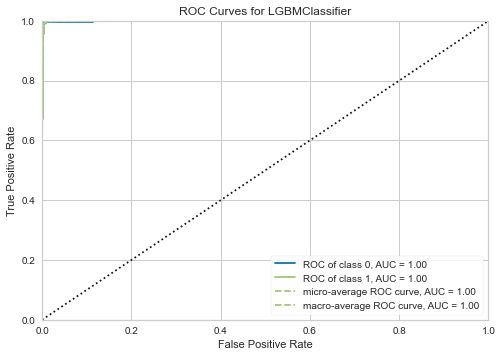

In [22]:
plot_model(tuned_lightgbm, plot = 'auc')

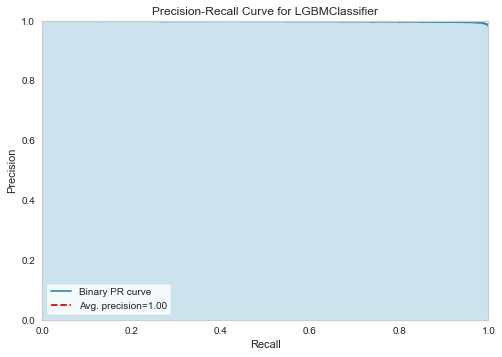

In [23]:
plot_model(tuned_lightgbm, plot = 'pr')

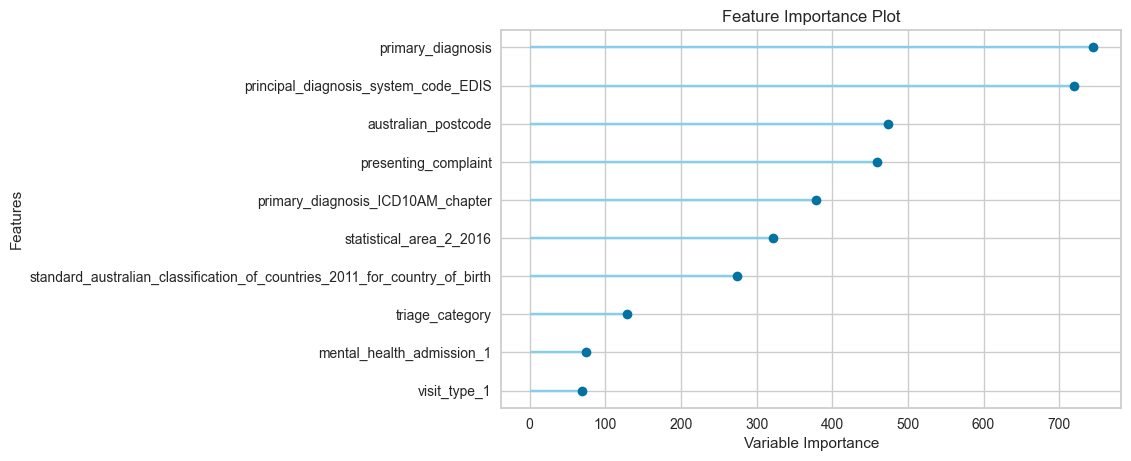

In [24]:
plot_model(tuned_lightgbm, plot='feature')

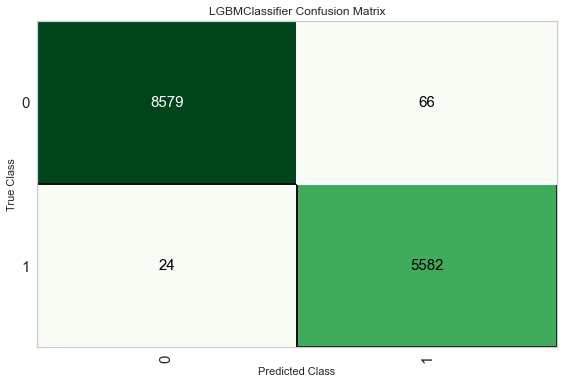

In [26]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#True Positive:
#Interpretation: You predicted positive and it’s true.
#You predicted that a woman is pregnant and she actually is.
#True Negative:
#Interpretation: You predicted negative and it’s true.
#You predicted that a man is not pregnant and he actually is not.
#False Positive: (Type 1 Error)
#Interpretation: You predicted positive and it’s false.
#You predicted that a man is pregnant but he actually is not.
#False Negative: (Type 2 Error)
#Interpretation: You predicted negative and it’s false.
#You predicted that a woman is not pregnant but she actually is.

In [27]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9937,0.9990,0.9957,0.9883,0.9920,0.9868,0.9868


,occupation,triage_category,primary_diagnosis,presenting_complaint,statistical_area_2_2016,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,standard_australian_classification_of_countries_2011_for_country_of_birth,australian_postcode,establishment_code_101,...,age_3.0,age_4.0,age_5.0,age_6.0,age_7.0,age_8.0,age_9.0,admission,Label,Score
0,-6.250750e-08,3.0,-0.457238,-0.613802,0.100571,-0.787402,-0.379933,-0.497437,1.888710,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9998
1,-6.250750e-08,3.0,1.710785,-0.182829,0.078839,0.150591,-0.647378,-0.497437,1.006108,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9932
2,4.897132e-01,0.0,3.310233,-0.413250,0.068189,-0.634924,3.412442,-0.498523,-0.272941,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9989
3,-6.250750e-08,2.0,-0.680417,-0.583933,0.132739,1.431516,-0.604587,-0.336663,-1.482540,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9987
4,-6.250750e-08,2.0,-0.170294,-0.547662,0.089705,-0.758562,-0.091092,-0.499066,-0.241110,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,-6.250750e-08,1.0,-0.454581,-0.490057,0.100786,1.431516,-0.428073,0.152720,-0.443674,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9987
14247,-6.250750e-08,2.0,-0.664476,-0.613802,0.089815,-0.758562,-0.607262,-0.499066,-1.410195,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9980
14248,-6.250750e-08,3.0,-0.406757,-0.605268,0.100464,1.431516,-0.329118,-0.497437,-0.408949,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9998
14249,-6.250750e-08,1.0,-0.600710,-0.549796,0.100464,1.431516,-0.543075,-0.499066,0.427353,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9999


In [31]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [33]:
#Final ADA parameters for deployment
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [35]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9964,0.9995,0.9990,0.9918,0.9954,0.9924,0.9924


,sequence_number,establishment_code,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,...,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,emergency_department_information_system_covid19_flag,Label,Score
0,136297,101,2,4,1,2,1,NaN,4,1,...,0,0,0,0,0,NaN,30,NaN,0,0.9999
1,136266,101,2,1,1,2,9,NaN,4,1,...,0,1,0,1,0,NaN,31,NaN,0,0.9997
2,136449,101,2,9,6,2,1,NaN,3,16,...,0,0,0,0,0,NaN,17,NaN,1,0.9971
3,136265,101,2,4,1,2,9,NaN,4,1,...,0,0,0,0,0,NaN,22,NaN,0,0.9992
4,136310,101,1,4,1,2,1,17.0,3,1,...,0,0,0,0,0,NaN,22,NaN,0,0.9974


In [36]:
unseen_predictions[["admission","Label"]].head(50)

,admission,Label
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [37]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['admission'], unseen_predictions['Label'], metric = 'Accuracy')

0.9964

In [38]:
save_model(final_lightgbm, 'lightgbm_admission_01_07_2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['sequence_number',
                                                        'attendance_length_of_episode',
                                                        'reattendance_within_48_hours_for_the_same_condition',
                                                        'admission_with_length_of_episode_less_than_or_equal_to_4_hours',
                                                        'admission_with_length_of_episode_less_than_or_equal_to_4_hours...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=66,
                                 min_child_weight=0.001, min_split_gain=0.4,
       

In [4]:
new_dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/emergency_arrivals_powerbi_test_10k.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str',
  'ambulance_number':'str'})

In [13]:
from pycaret.classification import load_model
saved_lightgbm = load_model('/Users/he145100/lightgbm_admission_01_07_2022')
print(saved_lightgbm)

Transformation Pipeline and Model Successfully Loaded
Pipeline(steps=[('dtypes',
                 DataTypes_Auto_infer(features_todrop=['sequence_number',
                                                       'attendance_length_of_episode',
                                                       'reattendance_within_48_hours_for_the_same_condition',
                                                       'admission_with_length_of_episode_less_than_or_equal_to_4_hours',
                                                       'admission_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
                                                       'departure_with_length_of_episode_less_th...
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 LGBMClassifier(bagging_fraction=0.7, bagging

In [15]:
from pycaret.classification import *
new_prediction = predict_model(saved_lightgbm, data=new_dataset)

In [16]:
new_prediction.head()

,sequence_number,establishment_code,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,mode_of_arrival,referral_source,primary_diagnosis,presenting_complaint,major_diagnostic_category,human_intent_of_injury,feeder_system,external_cause_of_injury,state,claim_type,senior_doctor_type,ambulance_number,statistical_area_2_2016,payment_classification,aboriginality,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,additional_diagnosis_system_code_EDIS,standard_australian_classification_of_countries_2011_for_country_of_birth,australian_postcode,metropolitan_hospital_flag,rural_hospital_flag,local_health_network,attendance_length_of_episode,attendance,attendance_with_length_of_episode_less_than_or_equal_to_4_hours,attendance_with_length_of_episode_less_than_or_equal_to_4_hours_denominator,mental_health_attendance,mental_health_attendance_with_length_of_episode_less_than_or_equal_to_4_hours,mental_health_attendance_with_length_of_episode_less_than_or_equal_to_4_hours_denominator,admission,admission_with_length_of_episode_less_than_or_equal_to_4_hours,admission_with_length_of_episode_less_than_or_equal_to_4_hours_denominator,mental_health_admission,departure,departure_with_length_of_episode_less_than_or_equal_to_4_hours,departure_with_length_of_episode_less_than_or_equal_to_4_hours_denominator,transfer,transfer_with_length_of_episode_less_than_or_equal_to_4_hours,transfer_with_length_of_episode_less_than_or_equal_to_4_hours_denominator,reattendance_within_48_hours_for_the_same_condition,reattendance_within_48_hours_for_the_same_condition_denominator,seen_within_recommended_time,seen_within_recommended_time_denominator,winter_related_illness_attendance,winter_related_illness_admission,potentially_avoidable_general_practitioner_type_attendance,potentially_avoidable_general_practitioner_type_attendance_denominator,affected_by_both_drugs_and_alcohol,affected_by_alcohol_only,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,emergency_department_information_system_covid19_flag,Label,Score
0,1101239629,105,1,4,5,2,7.0,NaN,2,1,3,4,NaN,C0000,NaN,9,E,99.0,5.0,NaN,NaN,21541354,504011045,99,2,Missing,NaN,NaN,1201,6053,1,0,01 North Metro (inc. JHC),NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,64,0,1,0.5373
1,1101239628,208,2,4,1,2,7.0,NaN,2,1,3,4,NaN,J0000,NaN,9,E,99.0,5.0,NaN,NaN,NaN,501021254,99,2,Missing,NaN,NaN,0904,6230,0,1,05 WACHS,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,57,0,1,0.6715
2,1101239627,101,1,4,5,2,3.0,NaN,2,1,3,4,NaN,JJBA0,NaN,3,E,9.0,5.0,NaN,NaN,21541357,505031108,99,2,Missing,NaN,NaN,0905,6065,1,0,03 East Metro,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,41,0,1,0.5409
3,1101239626,642,2,4,1,2,8.0,NaN,4,1,1,4,NaN,CCC00,NaN,9,E,99.0,5.0,NaN,NaN,NaN,505031108,99,2,Missing,NaN,NaN,0905,6065,1,0,01 North Metro (inc. JHC),NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,18,0,0,0.8639
4,1101239625,277,2,4,1,2,1.0,NaN,3,1,1,4,U07.1,PG000,NaN,9,E,99.0,5.0,NaN,NaN,NaN,507051193,99,2,(U00-U49) Provisional assignment of new diseas...,D12771,D12693,0901,6169,1,0,02 South Metro,42.0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,NaN,2,0,1,0.5035


In [21]:
from pycaret.utils import check_metric
check_metric(new_prediction['admission'], new_prediction['Label'], metric = 'Accuracy')

0.5705